In [1]:
# importing the dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetching dataset - 1

df1 = pd.read_csv('ev_charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [3]:
# fetching dataset - 2

df2 = pd.read_excel('ev_charging_station_dataset.xlsx', sheet_name='Table 4', header=1)
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [4]:
# fetching dataset - 3

df3 = pd.read_excel('ev_market_india_dataset.xlsx')
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Exploratory Data Analysis (EDA)

***Analysing the datasets***

In [5]:
# checking the shape (# of rows and columns) of the datasets

print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (24, 6)
DF2 Shape:  (31, 2)
DF3 Shape:  (103, 14)


In [6]:
# checking the info (columns, datatypes, nulls) of the datasets

print('\n\n**************** DATASET 1 ****************\n\n')
print(df1.info())

print('\n\n**************** DATASET 2 ****************\n\n')
print(df2.info())

print('\n\n**************** DATASET 3 ****************\n\n')
print(df3.info())



**************** DATASET 1 ****************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB
None


**************** DATASET 2 ****************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes
None


**************** DATASET 3 ****************


<class 'pandas.core.frame.DataFra

In [7]:
# getting a statistical summary of the datasets

d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()

display('**************** DATASET 1 ****************', d1, 
        '**************** DATASET 2 ****************', d2, 
        '**************** DATASET 3 ****************', d3)

'**************** DATASET 1 ****************'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'**************** DATASET 2 ****************'

,EV Charging Facility
count,31.000000
mean,49.548387
std,50.768651
min,1.000000
25%,4.000000
50%,26.000000
75%,81.500000
max,174.000000


'**************** DATASET 3 ****************'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


***Analysis of 2-wheeler EVs***

Observation : Maharashtra, Gujarat, Tamilnadu, Karnataka and Andhra Pradesh are among the top states with the majority of EV 2-wheelers while Assam, Himachal Pradesh, Sikkim, J&K with the least.

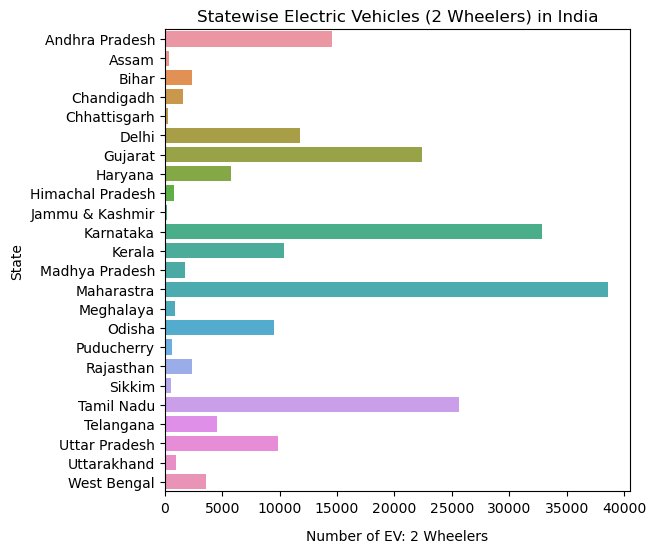

In [8]:
# 2 wheelers data visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = '2W')

plt.ylabel('State')
plt.xlabel('Number of EV: 2 Wheelers', labelpad = 10)
plt.title('Statewise Electric Vehicles (2 Wheelers) in India')
plt.show()

***Analysis of 3-wheeler EVs***

Observation : Uttar Pradesh, Assam and Bihar are among the top states with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

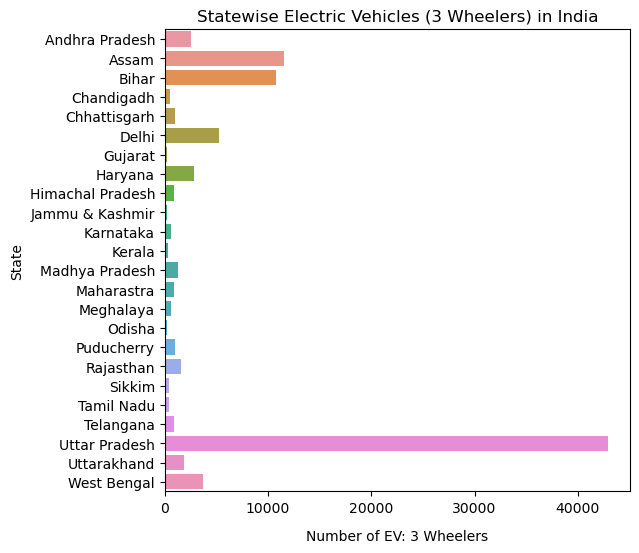

In [9]:
# 3 wheelers data visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = '3W')

plt.ylabel('State')
plt.xlabel('Number of EV: 3 Wheelers', labelpad=10)
plt.title('Statewise Electric Vehicles (3 Wheelers) in India')
plt.show()

***Analysis 4-wheeler EVs***

Observation : Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh are among the top states with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

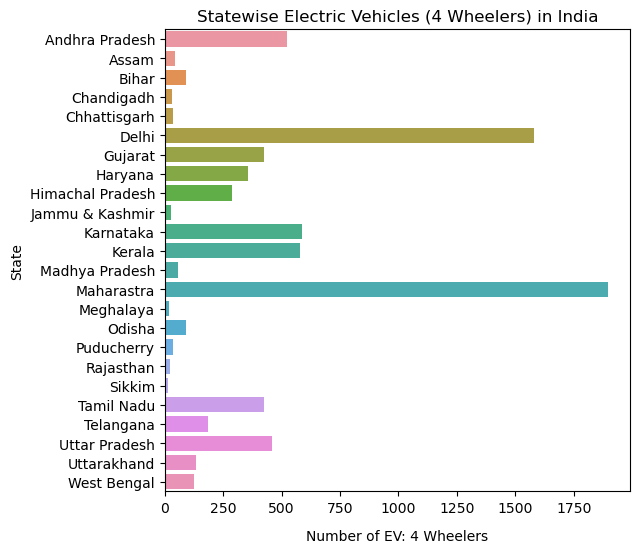

In [10]:
# 4 wheelers data visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = '4W')

plt.ylabel('State')
plt.xlabel('Number of EV: 4 Wheelers', labelpad=10)
plt.title('Statewise Electric Vehicles (4 Wheelers) in India')
plt.show()

***Analysis of charging stations sanctioned***

Observation : Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

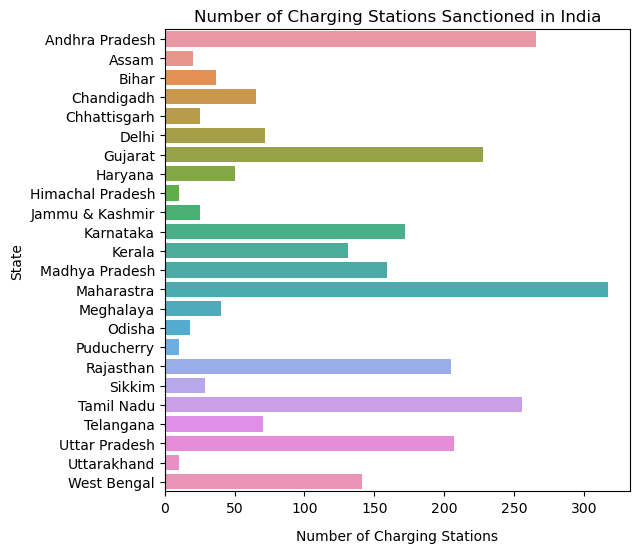

In [11]:
# charging stations sanctioned visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = 'Chargers')

plt.ylabel('State')
plt.xlabel('Number of Charging Stations', labelpad=10)
plt.title('Number of Charging Stations Sanctioned in India')
plt.show()

***Analysis of retail outlets for EV charging***

Observation : Rajasthan, Madhya Pradesh, Maharashtra, Karnataka, Uttar Pradesh are among the top states with the majority of retail outlets for EV charging while the remaining states have less number of the same.

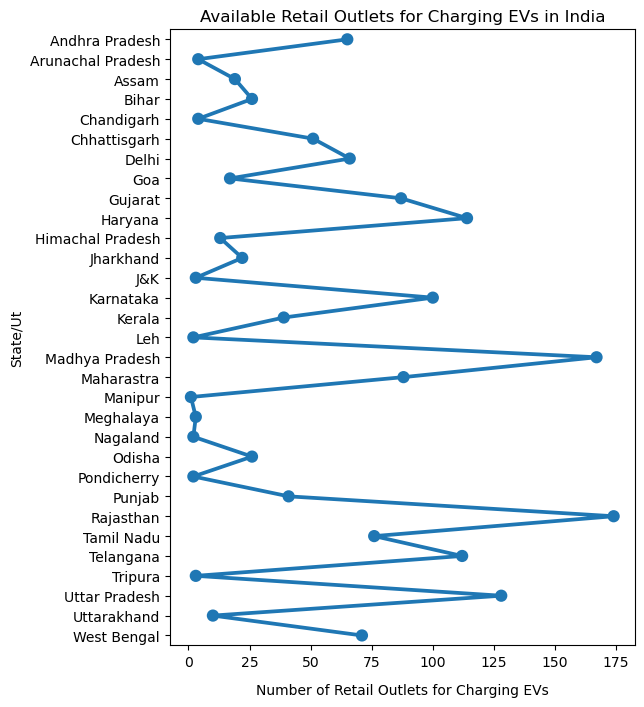

In [12]:
# retail outlets visualization from dataset - 2

plt.figure(figsize = (6, 8))

sns.pointplot(data = df2, y = 'State/UT', x = 'EV Charging Facility')

plt.xlabel('Number of Retail Outlets for Charging EVs', labelpad=10)
plt.ylabel('State/Ut')
plt.title('Available Retail Outlets for Charging EVs in India')
plt.show()

***Analysis of EVs based on brands***

Observation : Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

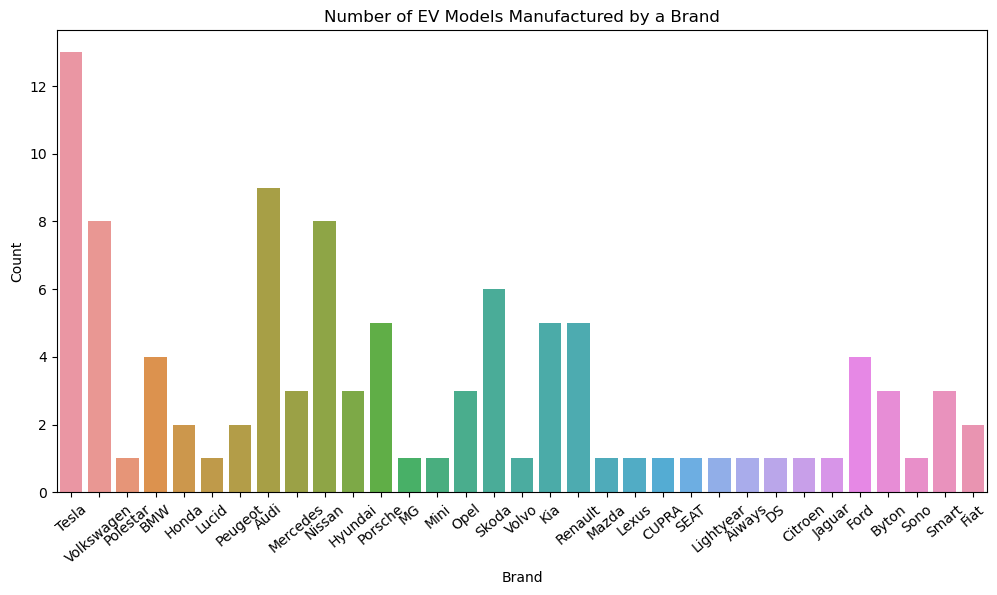

In [13]:
# brand-wise count of EV models

plt.figure(figsize = (12, 6))

sns.countplot(data = df3, x = 'Brand')

plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

***Anaysis of different body types of EVs***

Observation : SUV and Hatchback body types form the majority while Station and MPV the minority.

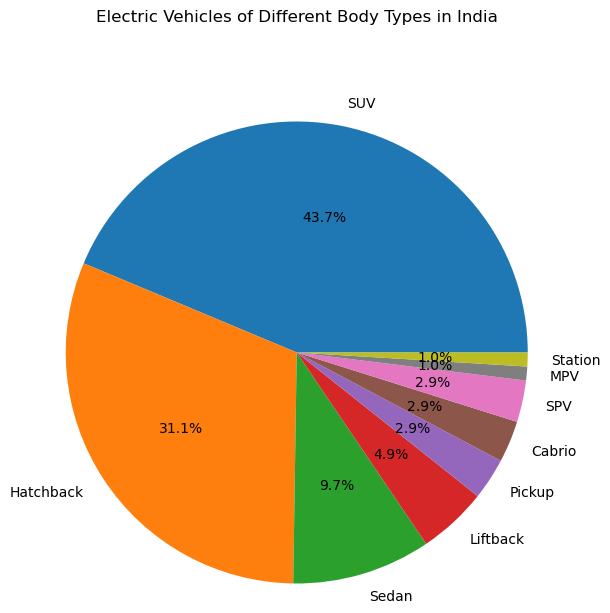

In [14]:
# different body types EVs visualization from dataset 3

plt.figure(figsize = (5, 5))

x = df3['BodyStyle'].value_counts().plot.pie(radius = 1.5, startangle = 0, autopct='%1.1f%%')
plt.title('Electric Vehicles of Different Body Types in India', pad=100)
plt.ylabel('')
plt.show()

***Analysis of different segments of EVs***

Observation : B and C body segments form the majority while S and A the minority.

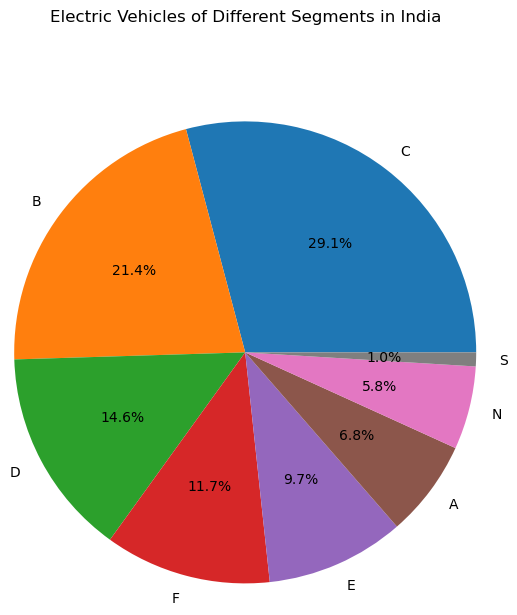

In [15]:
# analysis of different segments of EVs from dataset 3

plt.figure(figsize = (5, 5))

x = df3['Segment'].value_counts().plot.pie(radius = 1.5, startangle = 0, autopct='%1.1f%%')
plt.title('Electric Vehicles of Different Segments in India', pad=100)
plt.ylabel('')
plt.show()

***Analysis of EVs of different number of seats***

Observation : EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.

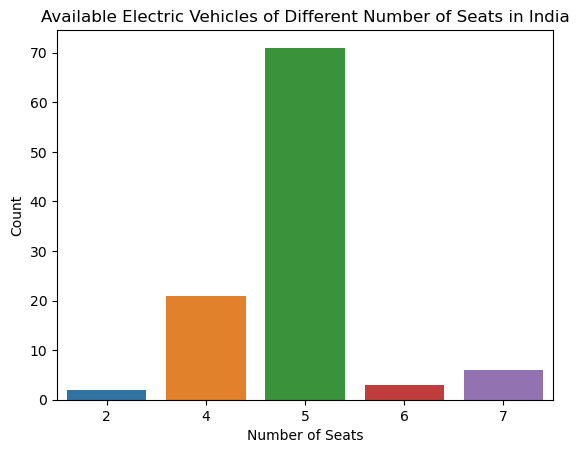

In [16]:
# EVs of different number of seats from dataset 3

sns.countplot(data = df3, x = 'Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title('Available Electric Vehicles of Different Number of Seats in India')
plt.show()

***Analysis of the number of seats by each brand***

Observation : Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

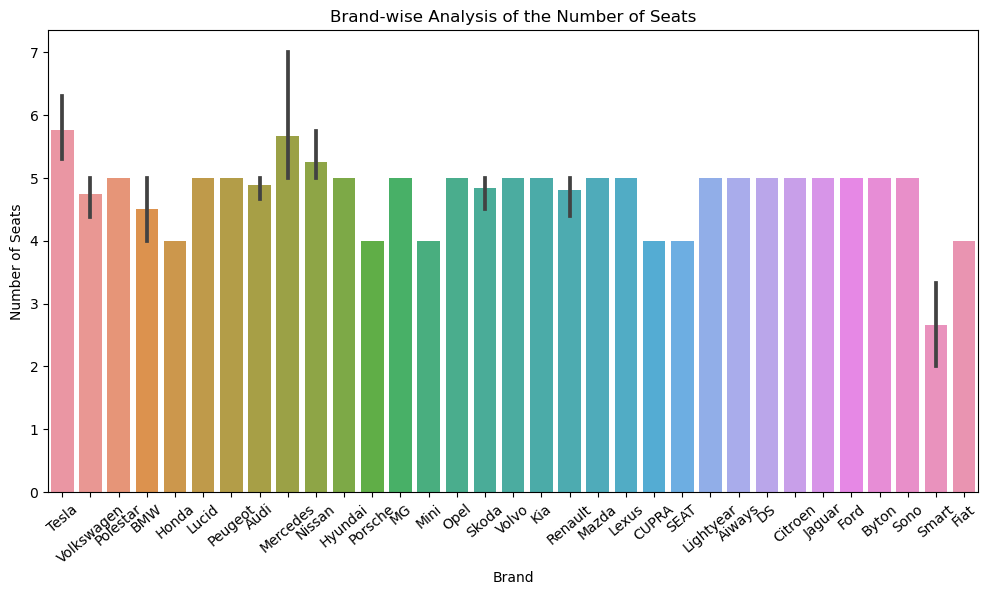

In [17]:
# brand-wise analysis of the number of seats

plt.figure(figsize = (12, 6))

sns.barplot(data = df3, x = 'Brand', y = 'Seats')

plt.tick_params(axis = 'x', rotation = 40)
plt.xlabel('Brand')
plt.ylabel('Number of Seats')
plt.title('Brand-wise Analysis of the Number of Seats')
plt.show()

***Analysis of different plug types***

Observation : EVs with plus type of 'Type 2 CCS' seem to dominate the market.

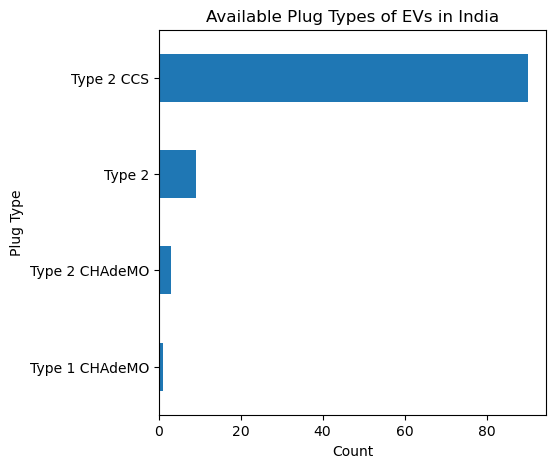

In [18]:
# plug types visualization from dataset 3

plt.figure(figsize = (5, 5))

df3['PlugType'].value_counts().sort_values(ascending=True).plot.barh()

plt.xlabel('Count')
plt.ylabel('Plug Type')
plt.title('Available Plug Types of EVs in India')
plt.show()

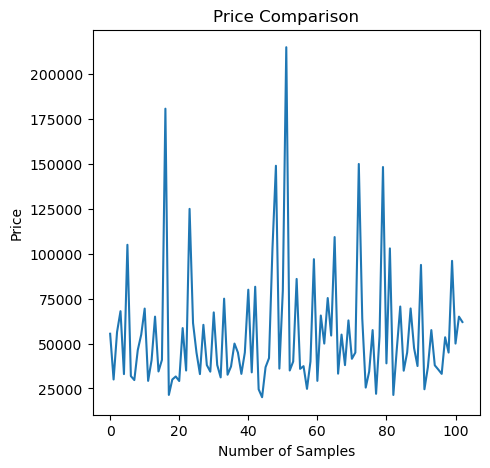

In [19]:
# plotting the price from dataset 3

plt.figure(figsize = (5, 5))

plt.plot(df3['PriceEuro'])

plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison')
plt.show()

***Analysis of EVs based on accleration***

Observation : Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.

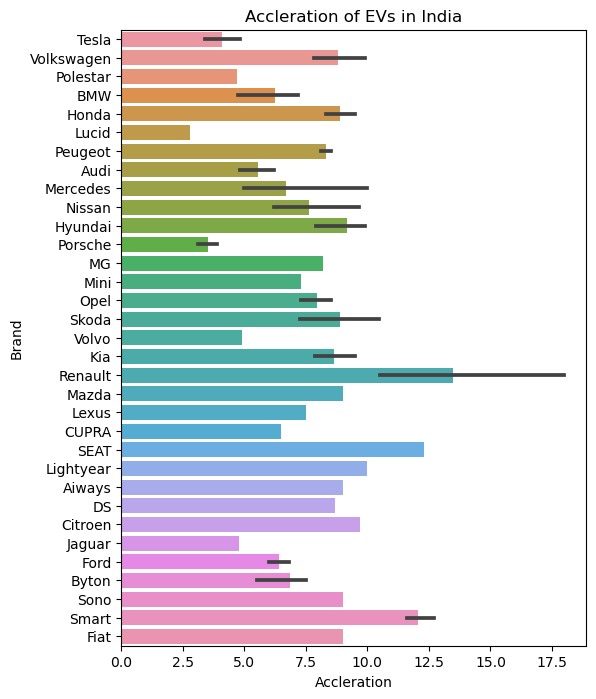

In [20]:
# accleration visualization from dataset 3

plt.figure(figsize = (6, 8))

sns.barplot(data = df3, y = 'Brand', x = 'AccelSec')

plt.xlabel('Accleration')
plt.ylabel('Brand')
plt.title('Accleration of EVs in India')
plt.show()

***Analysis of EVs based on speed***

Observation : Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

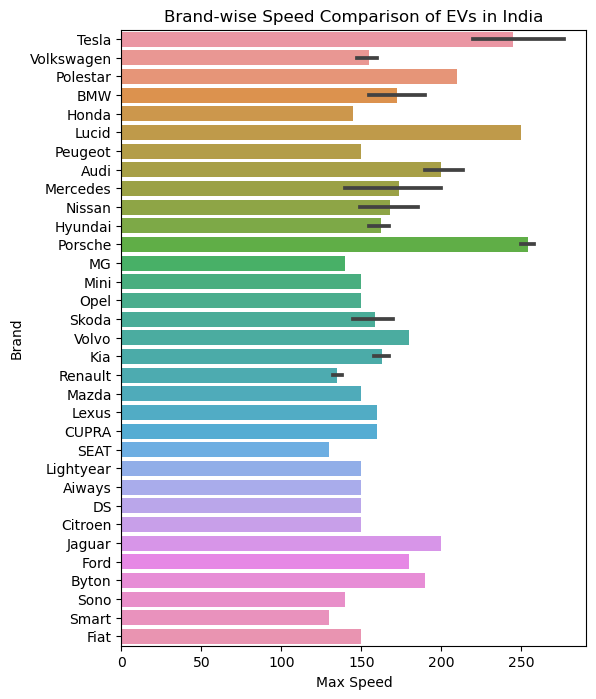

In [21]:
# speed visualization from dataset 3

plt.figure(figsize = (6, 8))

sns.barplot(data = df3, x = 'TopSpeed_KmH', y = 'Brand')

plt.xlabel('Max Speed')
plt.ylabel('Brand')
plt.title('Brand-wise Speed Comparison of EVs in India')
plt.show()

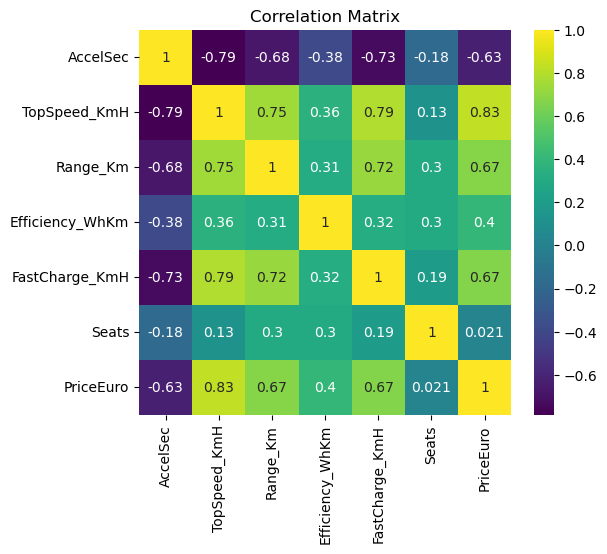

In [22]:
# plotting the correlation matrix from dataset 3

plt.figure(figsize = (6, 5))

sns.heatmap(data = df3.corr(), annot = True, cmap = 'viridis')
plt.title('Correlation Matrix')
plt.show()

***Analysis of EVs based on the range parameter***

Observation : Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

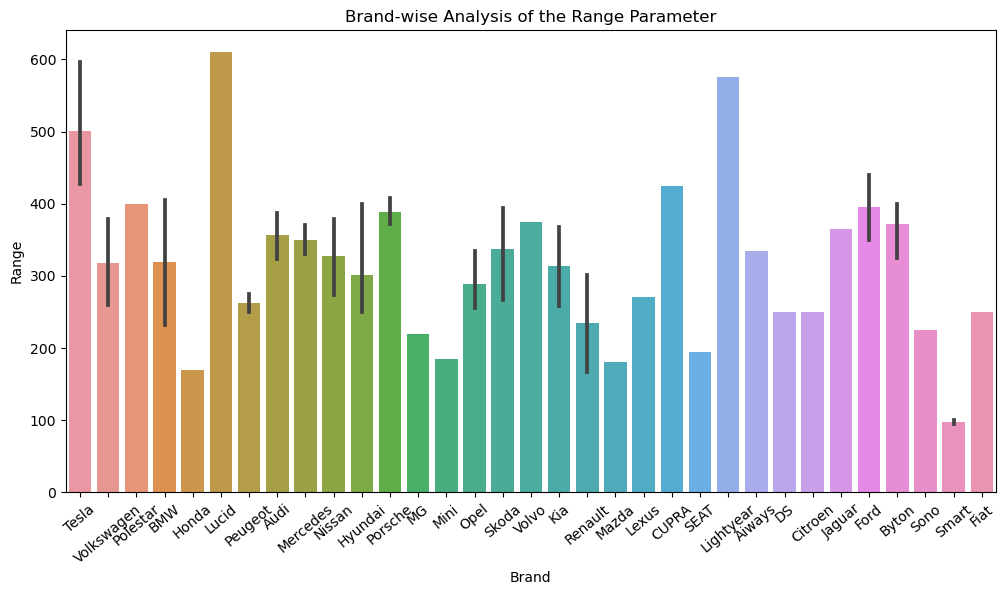

In [23]:
# brand-wise analysis of the range parameter

plt.figure(figsize = (12, 6))

# sns.catplot(kind='bar', data=df3, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)

sns.barplot(data = df3, x = 'Brand', y = 'Range_Km')

plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Range')
plt.title('Brand-wise Analysis of the Range Parameter')
plt.show()

### Data Preprocessing

***Checking Missing Values***

In [24]:
print('\n\n**************** DATASET 1 ****************\n\n')
print(df1.isnull().sum())

print('\n\n**************** DATASET 2 ****************\n\n')
print(df2.isnull().sum())

print('\n\n**************** DATASET 3 ****************\n\n')
print(df3.isnull().sum())



**************** DATASET 1 ****************


Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
dtype: int64


**************** DATASET 2 ****************


State/UT                0
EV Charging Facility    0
dtype: int64


**************** DATASET 3 ****************


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


***Encoding the categorical features***

In [25]:
# PowerTrain feature

df3['PowerTrain'] = df3['PowerTrain'].replace({'RWD' : 0, 'FWD' : 1, 'AWD' : 2})

In [26]:
# RapidCharge feature

le = LabelEncoder()

df3['RapidCharge'] = le.fit_transform(df3['RapidCharge'])

***Features Scaling***

In [27]:
X = df3[['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 
         'PriceEuro','PowerTrain']]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Principle Component Analysis (PCA)

In [28]:
pca = PCA(n_components = 9)

X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


### Model Building Using K-Means Clusteing

<Figure size 600x500 with 0 Axes>

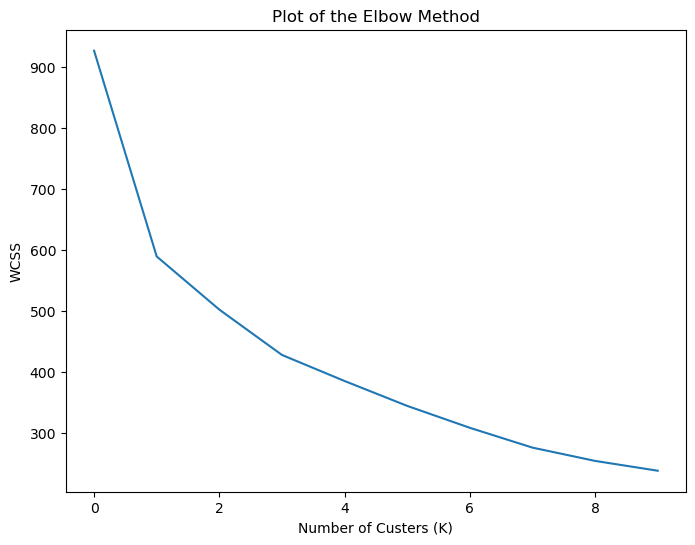

In [29]:
# plotting the results of Elbow

plt.figure(figsize = (6, 5))

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(wcss)
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.show()

In [30]:
# training the model using k=4 as rendered by the above plot

kmean = KMeans(n_clusters = 4, init = 'k-means++', random_state = 90)

kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [31]:
# check the labels assigned to each data point

print(kmean.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [32]:
# check the size of clusters

pd.Series(kmean.labels_).value_counts()

1    39
2    32
3    19
0    13
dtype: int64

In [33]:
# adding a new feature of cluster labels to the dataset 3

df3['clusters'] = kmean.labels_

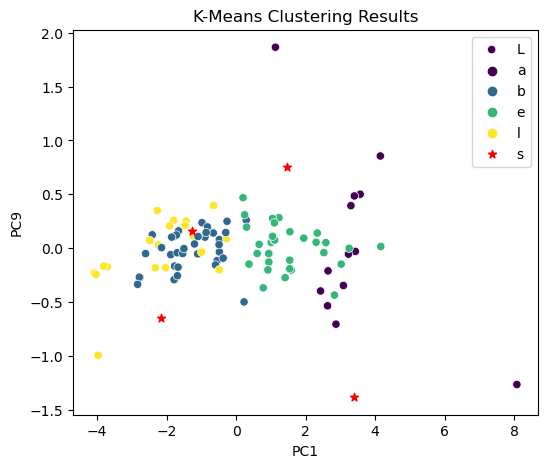

In [34]:
# visualizing clusters

plt.figure(figsize = (6, 5))

sns.scatterplot(data = df_pca, x = 'PC1', y = 'PC9',  hue = kmean.labels_, palette = 'viridis')
plt.scatter(x = kmean.cluster_centers_[:,0], y = kmean.cluster_centers_[:,1], marker = "*", c = "r", label = "centroids")

plt.xlabel('PC1')
plt.ylabel('PC9')
plt.legend('Labels')
plt.title('K-Means Clustering Results')
plt.show()